<h1 style = "padding: 20px; text-align: center;">Exploring the Titanic Survival Dataset.</h1>

We'll start off by loading the required base libraries for the project. These are the only ones we need to manipulate and visualize our data.

In [1]:
#libraries required for data wrangling.
import numpy as np
import pandas as pd

#libraries required for visual feature analysis.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We'll also be needing several libraries that contain various classifier models.

In [2]:
#libraries containing classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Loading and Viewing the Training and Test Data.
Enter the path to the folder containing the .csv files in the `path` variable and replace the file's name with your local copy's in order to load the file.


We then print out the head of our training dataset to take a look at what we've got.

In [3]:
path = 'C:/Users/LENOVO/titanic_project/'

train_df = pd.read_csv(path + 'titanic_train.csv')
test_df = pd.read_csv(path + 'titanic_test.csv')

In [4]:
print("Column names: {}".format(train_df.columns.values))
train_df.head()

Column names: ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


As we can see, we've the following 12 columns:
*PassengerID : the unique id of the individual passengers
* Survived: survival information, 0 indicates failure(death) while 1 indicates success(survival)
* Pclass: The class in which the passengers were travelling.
* Name: Name of the passengers.
* Sex: Passengers' gender.
* Age: Passengers' Age.
* Parch: Number of parents/gaurdians abord the titanic for each passenger.
* SibSB: Number of siblings aboard the titanic for each passenger.
* Ticket: ticket number of each passenger.
* Fare: Fare that each passenger paid for the voyage.
* Cabin: Cabin number where each passenger stayed.
* Embarked: The city from which each passenger embarked upon the titanic.



The Survived Column is obviously our label i.e. this is what we have to predict, and it is thus missing from the test set.

As for the other columns, categorizing them would help us better understand and decide upon the features.

The following are the categories and the labels that fit in those categories:

* Categorical: Sex and Embarked.
* Ordinal: Pclass
* Numerical: 
    * Continuous: Age and Fare
    * Discreet: SibSp and Parch
* Alphanumerical: Ticket

NOTE: Both `Name` and `PassengerId` can be treated as unique identifiers for each passenger, and thus aren't independant variables that our outcome depends upon. Intuitively, it makes sense because calamity is not subjective.



<h1 style = "padding : 20px; text-align: center;">Looking for patterns</h1>



Now that we understand what our training data consists of, the next step is finding patterns in the data, both good and bad. This will help us decide upon which features may contribute positively or negatively towards model optimization.

    
# 1. Null Values
Let's start by taking a look at the amount of null values in the training data.

In [5]:
print("Null values in training data:\n{}\n\nNull values in test data:\n{}".format(train_df.isnull().sum(), test_df.isnull().sum()))

Null values in training data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Null values in test data:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Clearly enough, `Cabin` consits of the most `Nan` values followed by `Age` in case of both training and test data.

Null values generally give machine learning models a very hard time and can lead to substantial reduction in any model's performance. So, we now know that we'll have to deal with these.

# 2. Numerical Values' Distribution.

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In the above table, we can observe:
* There are a total of 891 values in each column of the dataset.
* The survival rate among these 891 passengers is around 38%, in comparison to the factual 32% survival rate of the incident reports.
* Nearly 30% of the passengers had siblings aboard.
* Fare variation is low, with the exception of one person paying a relatively large amount of 512 dollars. This is an outlier.
* The mean age of the passengers is 29 years with a standard deviation of 14. Nearly 75% of the passengers are under 38 years of age. A few outliers exist(above 80 years).
* Most of the passengers(nearly 75%) did not travel with parents/gaurdians.

# 3. Categorical Values' Distribution

In [7]:
train_df.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Duane, Mr. Frank",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


* As surmised before, all 891 passengers' names are unique.
* 577/891 or around 65% of the passengers are male.
* Ticket numbers have 210 duplicate values.
* Most of the passengers have embarked on the voyage from the city denoted by `S`.
* Out of 204 cabin values, only 147 are unique-indicating the fact that several people shared cabins.

<h1 style = "text-align:center; padding: 20px;">Making the useful corrections</h1>

Using the above observations, we can do the following from the get-go:
* Drop the `Name` since they're not features(we could do something with them but lets keep this one simple).
* Drop `Cabin` because of its high null value count.
* Drop `Ticket` because of its low unique value count.
* Additionally, drop `PassengerId` from the training data.

One thing to note here, that the default parameter for `axis` in `df.drop()` command is 0, which means it looks for the specified values to be dropped in the rows. It's easy to forget about this and spend 20 minutes debugging what went wrong in the code. *Always sepcify axis = 1 while dropping rows form a dataframe.*

In [8]:
to_drop = ['Name', 'Cabin', 'Ticket']
train_df.drop(to_drop, axis = 1, inplace = True)
test_df.drop(to_drop, axis = 1, inplace = True)

train_df.drop('PassengerId', axis = 1, inplace = True)
print("Column Names: {}".format(np.unique(train_df.columns.values.tolist() + test_df.columns.values.tolist())))

Column Names: ['Age' 'Embarked' 'Fare' 'Parch' 'PassengerId' 'Pclass' 'Sex' 'SibSp'
 'Survived']


Now that that's taken care of, we have only one thing to worry about, that is the `Age` column which will be dealt with shortly.

<h1 style = "padding: 20px; text-align: center;">Correlation among and relevance of features</h1>

# 1. Pivoting individual features.
In this step, we "pivot" each feature with it's survival rate and print the result. The goal here is to look for patterns and answer natural questions of the form : *Did the Gender/Age/class of the passenger have any relation with their survival?"


In [9]:
pivots = ['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']
for pivot in pivots:
    print("Feature: {}\n\n".format(pivot), train_df[[pivot, 'Survived']].groupby([pivot], as_index=False).mean().sort_values(by='Survived', ascending=False))

Feature: Age

       Age  Survived
0    0.42       1.0
9    5.00       1.0
79  63.00       1.0
68  53.00       1.0
1    0.67       1.0
..    ...       ...
37  28.50       0.0
49  36.50       0.0
46  34.50       0.0
26  20.50       0.0
30  23.50       0.0

[88 rows x 2 columns]
Feature: Embarked

   Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957
Feature: Fare

          Fare  Survived
247  512.3292       1.0
196   57.9792       1.0
89    13.8583       1.0
88    13.7917       1.0
86    13.4167       1.0
..        ...       ...
103   15.5500       0.0
180   47.1000       0.0
179   46.9000       0.0
178   42.4000       0.0
124   21.0750       0.0

[248 rows x 2 columns]
Feature: Parch

    Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000
Feature: Pclass

    Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
Feature: Sex

       Se

* The gender of the passengers have a very strong correlation with survival rate. This feature is thus crucial for prediction.
* SibSp and Parch values have almost no correlation with survival above a certain value. Thus we can combine these features to form a better predictor.
* Passenger's class also has a high correlation with survival rate.

# 2. Visualizing relevant feature(s).

We can observe some relationships within and among features by visually depicting their survival rates next to each other using a graph.

Lets's begin by plotting the different `Pclass` categories next to each other based on their corresponding survival rates.

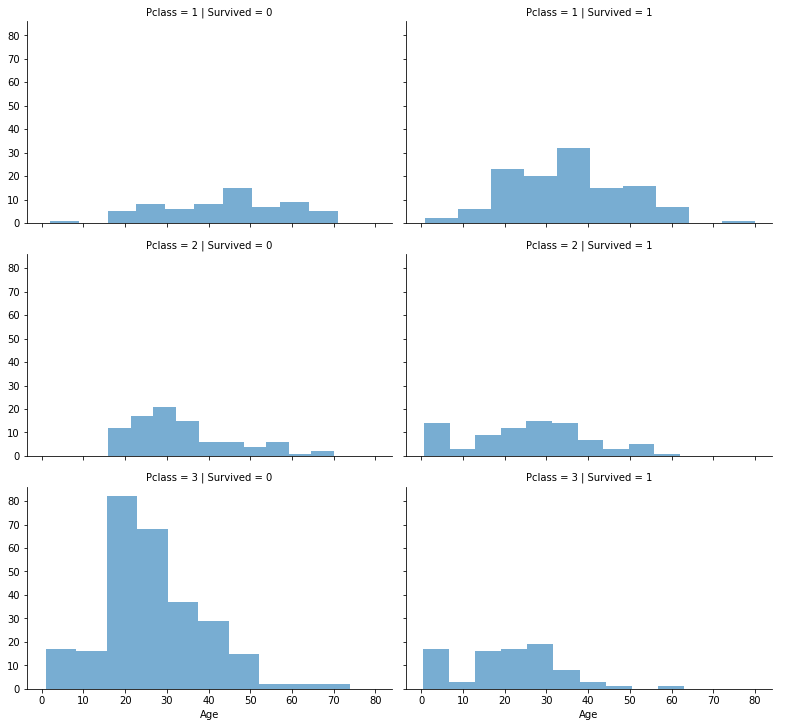

In [10]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=3.4, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.6, bins=10)
grid.add_legend();

This is an interesting result and depicts the need of understanding the data well.

As we see here, the passengers of class 3 had a significantly lesser surival rate in comparison to those who were travelling in class 1.
Although we might have guessed this intuitively, we can now evidently conclude(in a non-statistical sense) that higher class travelling passengers did have a higher rate of survival.

Mean Age of Passengers: 29.69911764705882


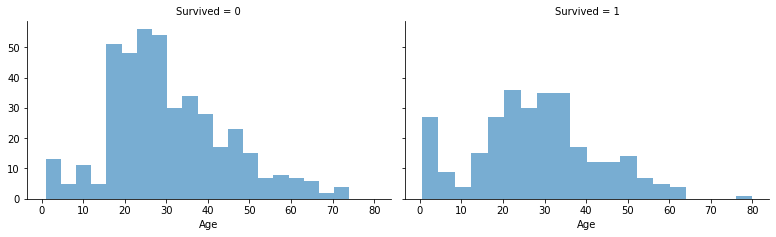

In [11]:
grid = sns.FacetGrid(train_df, col = 'Survived', height = 3.4, aspect = 1.6)
print("Mean Age of Passengers: {}".format(train_df['Age'].mean()))
grid.map(plt.hist, 'Age', alpha = 0.6,  bins = 20)

* Infants, and children (age <= 5) survived in the largest amount.
* Most deaths are observed in adults of 15-30 years of age.
* The only person above the age of 80 survived as well.

Thus, we should also include age in our model features and find a way to fill in the gaps for missing features.

The mean age of the passengers is observed to be 29.69, which can be used to substitute for the `NaN` values.

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


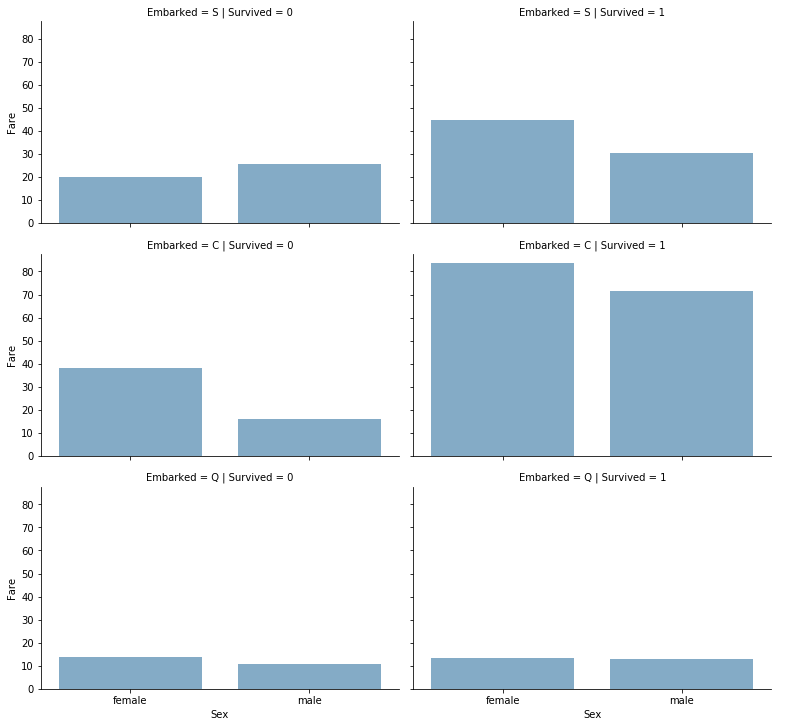

In [12]:
grid = sns.FacetGrid(train_df, row = 'Embarked', col = 'Survived', size = 3.4, aspect = 1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha = 0.6, ci = None)
grid.add_legend()

* In the first two bar graphs, we can observe the correlation between `fare` and `Survived` as well as between `Embarked` and `Survived`.
* People who paid more fair tended to survive more. Thus, we should include the `Fare` column in our feature set.
* The third bar graph shows absence of correlation between the `Fare` and `Sex` column.


<h1 style ="text-align: center"> Wrangling the Data</h1>

Now that we know the following:
* The overall dimensions and constituents of the dataset.
* The correlation among some features, and their correlation with our label.
* The amount of missing values in our dataset.
* The relevant features that we'd like to include in our model training.

We're more than prepared to wrangle our data. Note that we have already dropped the `Name`, `Ticket`, and `Cabin` columns while analyzing. So the first step is:

# Converting categorical non-numeric features into categorical numeric ones
Let's take a look at how our training dataframe looks currently:

In [13]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
print("Unique values in : \nSex: {}\nEmbarked:{}".format(set(train_df['Sex'].tolist()), set(train_df['Embarked'].tolist())))

Unique values in : 
Sex: {'male', 'female'}
Embarked:{'C', nan, 'Q', 'S'}


The only categorical features right now are:
* `Sex`: values from the set {`male`, `female`}.
* `Embarked`: values from the set {`S`, `Q`, `C`} and some missing values.

We can use a simple function to convert both of these into categorical values by storing the unique values in a dictionary and mapping each unique value to the equivalent unique integer. Lookup one-hot-encoding for more on how this works.

In [15]:
def convert_to_numeric(df):
    for col in df.columns.values:
        val_dict = {}
        if df[col].dtype != np.int64 and df[col].dtype != np.float64:
            unique_vals = set(df[col].values.tolist())
            val_id = 0
            for unique_ in unique_vals:
                if unique_ not in val_dict:
                    val_dict[unique_] = val_id
                    val_id += 1
            df[col] = list(map(lambda val : val_dict[val], df[col]))
    return df


train_df_copy = convert_to_numeric(train_df[['Sex', 'Embarked']])
train_df_copy.head()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Sex,Embarked
0,0,3
1,1,0
2,1,3
3,1,3
4,0,3


Our copy of the training dataframe now contains only numerical features, but if you look carefully, it converted `NaN` type values into another unique class as well.

This is undesirable and can cause loss of accuracy in our models, so before we apply the function to the actual training dataframe, it is better to deal with those missing values first.

Since the number of missing values is less, we can just fill them with the most frequently occuring value in the `Embarked` column, which as we'll see below, is `S`.

In [16]:
mode_embarked = train_df.Embarked.dropna().mode()[0]
mode_embarked

'S'

In [17]:
train_df['Embarked'] = train_df.Embarked.fillna('S')
set(train_df['Embarked'].tolist())

{'C', 'Q', 'S'}

In [18]:
test_df['Embarked'] = test_df.Embarked.fillna('S')
set(test_df.Embarked.tolist())

{'C', 'Q', 'S'}

Now, we can safely convert both our `Sex` and `Embarked` categorical features from non-numeric to numeric.

In [19]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [20]:
convert_to_numeric(train_df)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2


In [21]:
convert_to_numeric(test_df)
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,1
1,893,3,1,47.0,1,0,7.0000,2
2,894,2,0,62.0,0,0,9.6875,1
3,895,3,0,27.0,0,0,8.6625,2
4,896,3,1,22.0,1,1,12.2875,2


# Combining the SibSp and Parch Features

Since we observed earlier that there was no correlation among these 2 features, we can combine them to create a stronger feature. Let's call it `FamilySize`

In [22]:
for dataset in [train_df, test_df]:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


Let's combine these features into a categorical one called `IsAlone`. If that has better correlation with survival, we'll drop all three `FamilySize` `SibSp`, and `Parch` in favor of `IsAlone`. Otherwise we would keep `FamilySize` and drop the other two.

In [23]:
for dataset in [train_df, test_df]:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Thus, we drop the previous three columns and obtain a better feature.

In [24]:
for dataset in [train_df, test_df]:
    dataset.drop(['SibSp', 'Parch', 'FamilySize'], axis = 1, inplace = True)

In [25]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,0,22.0,7.2500,2,0
1,1,1,1,38.0,71.2833,0,0
2,1,3,1,26.0,7.9250,2,1
3,1,1,1,35.0,53.1000,2,0
4,0,3,0,35.0,8.0500,2,1


# Converting Fare into a categorical Feature

Based on the following fare ranges and survival rates, we can convert it into a categorical feature for better model evaluation.

In [26]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace = True)

train_df['FareRange'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareRange', 'Survived']].groupby(['FareRange'], as_index=False).mean().sort_values(by='FareRange', ascending=True)

,FareRange,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [27]:
for dataset in [train_df, test_df]:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0.0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1.0
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31.0), 'Fare']   = 2.0
    dataset.loc[dataset['Fare'] > 31.0, 'Fare'] = 3.0
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df.drop(['FareRange'], axis=1, inplace = True)
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,0,22.0,0,2,0
1,1,1,1,38.0,3,0,0
2,1,3,1,26.0,1,2,1
3,1,1,1,35.0,3,2,0
4,0,3,0,35.0,1,2,1
5,0,3,0,NaN,1,1,1
6,0,1,0,54.0,3,2,1
7,0,3,0,2.0,2,2,0
8,1,3,1,27.0,1,2,0
9,1,2,1,14.0,2,0,0


# Completing and looking at the Age feature.

The only wrangling left to do is to complete the age feature and then, if we observe a group correlation pattern with survival similar to what we observed in Fare, categorize it as such.

The first step is to fill the missing values.

In [28]:
for dataset in [train_df, test_df]:
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

In [29]:
train_df['AgeRange'] = pd.cut(train_df['Age'].astype(int), 5)
train_df[['AgeRange', 'Survived']].groupby('AgeRange', as_index = False).mean().sort_values(by = 'AgeRange', ascending = True)

,AgeRange,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.344762
2,"(32.0, 48.0]",0.403226
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [30]:
for dataset in [train_df, test_df]:    
    dataset.loc[ dataset['Age'] <= 16.0, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16.0) & (dataset['Age'] <= 32.0), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32.0) & (dataset['Age'] <= 48.0), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48.0) & (dataset['Age'] <= 64.0), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64.0, 'Age'] = 4
    dataset['Age'] = dataset['Age'].astype(int)

train_df.drop(['AgeRange'], axis = 1, inplace = True)
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,0,1,0,2,0
1,1,1,1,2,3,0,0
2,1,3,1,1,1,2,1
3,1,1,1,2,3,2,0
4,0,3,0,2,1,2,1
5,0,3,0,1,1,1,1
6,0,1,0,3,3,2,1
7,0,3,0,0,2,2,0
8,1,3,1,1,1,2,0
9,1,2,1,0,2,0,0


<h1 style = "text-align: center">Model Training</h1>

Now we're completely ready to train different machine learning models and test their scores.
One thing to note here is that while training different models, we may observe that some models perform better than others.
This, however, is never universal, rather always varies depending on the dataset, what data wrangling we've done, among other things.

Below is the list of classifiers we'll be feeding our training data to :

But first, let's split our data into training and test data.

In [31]:
train_df.columns.values.tolist()

['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'IsAlone']

In [32]:
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'IsAlone']
X_train = train_df[features]
y_train = train_df['Survived']

X_test = test_df[features]

print("X_train Shape : {}\ny_Train Shape: {}\nX_test Shape: {}\n".format(X_train.shape, y_train.shape, X_test.shape))

X_train Shape : (891, 6)
y_Train Shape: (891,)
X_test Shape: (418, 6)



# Pipelining the training process.

Although it is usually sufficient to import the neccessary model training and preprocessing libraries and then test each one independently, we can make our tasks much easier by pipelining the steps for our final model prediction.

Thus, we create a scaler object from `sklearn`s `preprocessing` module as well as a classifier object for each of the imported machine learning classifiers, namely:
* Stochastic Gradient Descent: The most basic perceptron with a custom learning rule and a cost func.
* Logistic Regression: An improvement upon the SGD in terms of regularization ability.
* The Support Vector Machine: We're the using the rbf kernel with a pretty high inverse sigma for better results in this case.
* Linear SVC: A linear version of the Support Vector Machine.
* K-nearest Neighbors: with k = 3.
* And a default decision tree and Random Forest Object.

We then put each of them in an iterable list.

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

sgd = SGDClassifier()
log_reg = LogisticRegression(solver = 'liblinear')
svc = SVC(kernel = 'rbf', C = 10.0)
linear_svc = LinearSVC()
knn_3 = KNeighborsClassifier(n_neighbors = 3)
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier(n_estimators=100)

clf_list = [sgd, log_reg, svc, linear_svc, knn_3, decision_tree, random_forest]

#clf_names = ["Stochastic Gradient Descent", "Logistic Regression", "SVM", "Linear SVC", "K-Nearest-Neighbours(n = 3)", "Decision Tree", "Random Forest"]


# Accuracy Testing with the training set.

For each classifer in `clf_list`, we build a pipeline that does the following:
1. Scales the training data.
2. Fits the scaled training data to the particular classifier model for wieght training.
3. Predicts and prints the average accuracy score as compared to the known target values.

In [34]:
from sklearn.pipeline import Pipeline
print("Accurary Scores tested against the training data's target values:")
for classifier in clf_list:
    pipeline = Pipeline([('sclaer', scaler), ('clf', classifier)])
    pipeline.fit(X_train, y_train)
    y_predict = pipeline.predict(X_train)
    print("{} : {}".format(type(classifier).__name__, ((y_predict == y_train)).sum() / y_predict.shape[0] * 100))

Accurary Scores tested against the training data's target values:
SGDClassifier : 75.75757575757575
LogisticRegression : 78.78787878787878
SVC : 85.0729517396184
LinearSVC : 78.78787878787878
KNeighborsClassifier : 82.94051627384961
DecisionTreeClassifier : 85.6341189674523
RandomForestClassifier : 85.6341189674523


As we can observe, the highest score is acheived by the Support Vector machine using the rbf kernel.
The second best is shared by Decision tree and Random Forest Classifier. Surprisingly, both of these have identical scores.

# Accuracy Testing with the training set.

For the training set, we'll be using the ground truth file, which contains reported factual truth about the survival or lack thereof for all passengers including those in the test set.

Apart from that, all the steps will remain the same.

In [35]:
ground_truth = pd.read_csv(path + 'ground_truth.csv')
y_test = ground_truth['Survived']

In [36]:
print("Accurary Scores for the test data tested against the known documented outcome of the Titanic crash: ")
for classifier in clf_list:
    pipeline = Pipeline([('scaler', scaler), ('clf', classifier)])
    pipeline.fit(X_train, y_train)
    y_predict = pipeline.predict(X_test)
    print("{} : {}".format(type(classifier).__name__, ((y_predict == y_test)).sum() / y_predict.shape[0] * 100))

Accurary Scores for the test data tested against the known documented outcome of the Titanic crash: 
SGDClassifier : 77.51196172248804
LogisticRegression : 76.79425837320574
SVC : 74.88038277511961
LinearSVC : 76.79425837320574
KNeighborsClassifier : 73.92344497607655
DecisionTreeClassifier : 76.31578947368422
RandomForestClassifier : 77.03349282296651


# Observations, and the road ahead..
A notable thing here, is that although on the training set, the SVC and forest methods delivered the best results, on the previously unseen test dataset, all three come second to the Linear SVC.

This may be the result of high inverse regularization parameter on a small dataset resulting in overfitting of the model. However, a definitive statment about its cause requires mathematical analysis beyond the scope of this demonstration. <a href = "https://stats.stackexchange.com/questions/31066/what-is-the-influence-of-c-in-svms-with-linear-kernel">This</a> is a good intuitive thread about it.

Still, one could apply this approach to <a href = "https://www.kaggle.com/competitions">several other introductory competitions on kaggle</a> in order to implement and better understand these techniques.
There is much further scope for improvement in the final accuracy.
A few things that could be done are:
* Make use of the `name` column removed earlier somehow.
* Benefit from the use of people's titles which are in the `name` column to better fill the missing age values(e.g. people lacking Mr. and Ms. are unlikely to be 29.5 years of age which is the median.)
* Use a different scaler for preprocessing.